## Comparative Analysis of Machine Learning and Deep Learning Models on Handwritten Digits (MNIST Dataset)

#### Project Aim

The aim of this project is to analyze and compare the performance of traditional machine learning models and a deep learning-based Convolutional Neural Network (CNN) for handwritten digit classification using the MNIST dataset.

#### Step 1: Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report

# Suppress warnings
warnings.filterwarnings("ignore")

### Insight:
To begin, we import essential libraries for data manipulation, visualization, machine learning models, and deep learning frameworks such as TensorFlow and Keras.

#### Step 2: Loading the MNIST Dataset

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("MNIST dataset loaded successfully.")

# Print count of loaded data
print(f"Total number of samples: {x_train.shape[0] + x_test.shape[0]}")
print(f"Number of training samples: {x_train.shape[0]}")
print(f"Number of testing samples: {x_test.shape[0]}")

MNIST dataset loaded successfully.
Total number of samples: 70000
Number of training samples: 60000
Number of testing samples: 10000


### Insight:
The MNIST dataset, which contains 70,000 grayscale images of handwritten digits (0-9), is loaded and split into training and testing sets.

- Training Data: 60,000 images

- Testing Data: 10,000 images

### Step 3: Splitting the Validation Set

In [3]:
# Split validation set BEFORE reshaping
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

#### Insight:
To evaluate model performance during training, 10% of the training data is set aside as a validation set.

### Step 4: Data Visualization

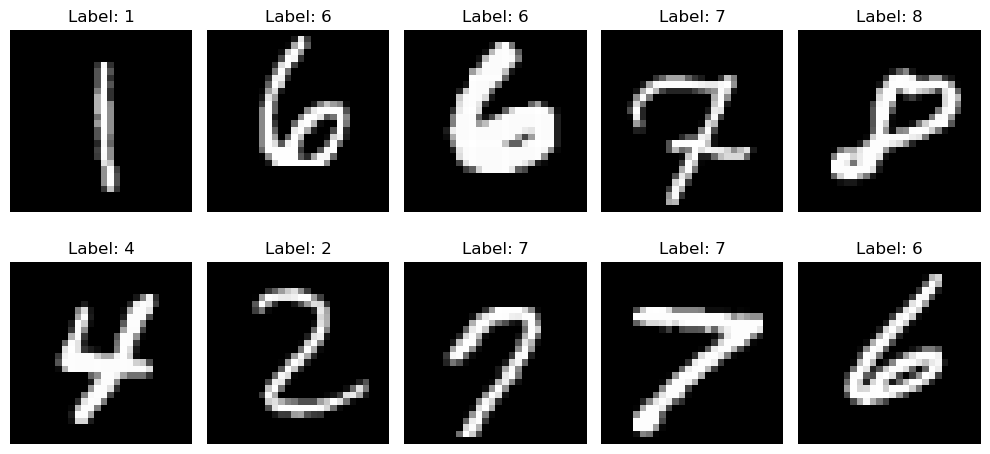

In [4]:
# Data Visualization
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

#### Insight:
A sample of the images from the dataset is visualized to understand the data distribution and structure.

### Step 5: Data Preprocessing

In [5]:
# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

# Flatten images for traditional ML models
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)

#### Insight:
- **Normalization:** Pixel values are scaled to the range [0,1] for better model convergence.

- **Flattening (for Traditional ML Models):** Images are reshaped from (28x28) to a single vector of 784 features for traditional machine learning models.

- **Reshaping (for CNN Model):** Images are reshaped into (28,28,1) to match the input shape required for CNNs.

### Step 6: Training Traditional Machine Learning Models

In [6]:
# Train traditional ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

accuracies = []

for name, model in models.items():
    model.fit(x_train_flat, y_train)
    y_pred = model.predict(x_test_flat)
    train_acc = accuracy_score(y_train, model.predict(x_train_flat))
    test_acc = accuracy_score(y_test, y_pred)
    accuracies.append([name, train_acc, test_acc])
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.89      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       980
           1       0.95      0.95      0.95      1135
           2    

#### Insight:
Five machine learning models are trained and evaluated:

- **Logistic Regression**

- **Decision Tree Classifier**

- **Support Vector Machine (SVM)**

- **K-Nearest Neighbors (KNN)**

- **Random Forest Classifier**

Each model is trained using the training data and evaluated on the test set.

### Step 7: Training a Convolutional Neural Network (CNN)

In [7]:
# CNN Model
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)
x_val_cnn = x_val.reshape(-1, 28, 28, 1)

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(x_train_cnn, y_train, validation_data=(x_val_cnn, y_val), epochs=10, batch_size=32)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 18ms/step - accuracy: 0.8525 - loss: 0.4636 - val_accuracy: 0.9837 - val_loss: 0.0599
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9742 - loss: 0.0885 - val_accuracy: 0.9872 - val_loss: 0.0453
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9811 - loss: 0.0656 - val_accuracy: 0.9908 - val_loss: 0.0356
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9843 - loss: 0.0511 - val_accuracy: 0.9902 - val_loss: 0.0389
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9869 - loss: 0.0419 - val_accuracy: 0.9912 - val_loss: 0.0356
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9894 - loss: 0.0328 - val_accuracy: 0.9925 - val_loss: 0.0280
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9905 - loss: 0.0284 - val_accuracy: 0.9923 - val_loss: 0.0293
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9921 -

#### Insight:
A CNN architecture is built with the following layers:

- **Conv2D & MaxPooling:** Feature extraction layers

- **Flatten Layer:** Converts 2D features into a 1D vector

- **Fully Connected (Dense) Layers:** Classification layers

- **Dropout Layer:** Prevents overfitting

The CNN is trained using the Adam optimizer for 10 epochs.



### Step 8: CNN Model Evaluation

In [8]:
# CNN Evaluation
y_pred_cnn = np.argmax(cnn_model.predict(x_test_cnn), axis=-1)
cnn_train_acc = cnn_model.evaluate(x_train_cnn, y_train, verbose=0)[1]
cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)[1]
accuracies.append(["CNN", cnn_train_acc, cnn_test_acc])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


### Step 9: Visualizing Model Performance

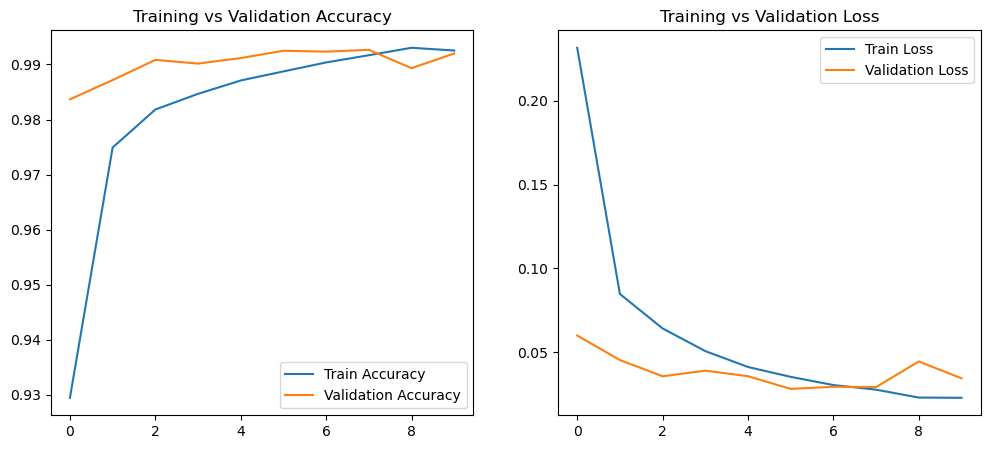


Model Performance Comparison:
                 Model  Training Accuracy  Testing Accuracy
0  Logistic Regression           0.938778            0.9255
1        Decision Tree           0.901537            0.8619
2                  SVM           0.989463            0.9782
3                  KNN           0.981019            0.9681
4        Random Forest           1.000000            0.9689
5                  CNN           0.997963            0.9917


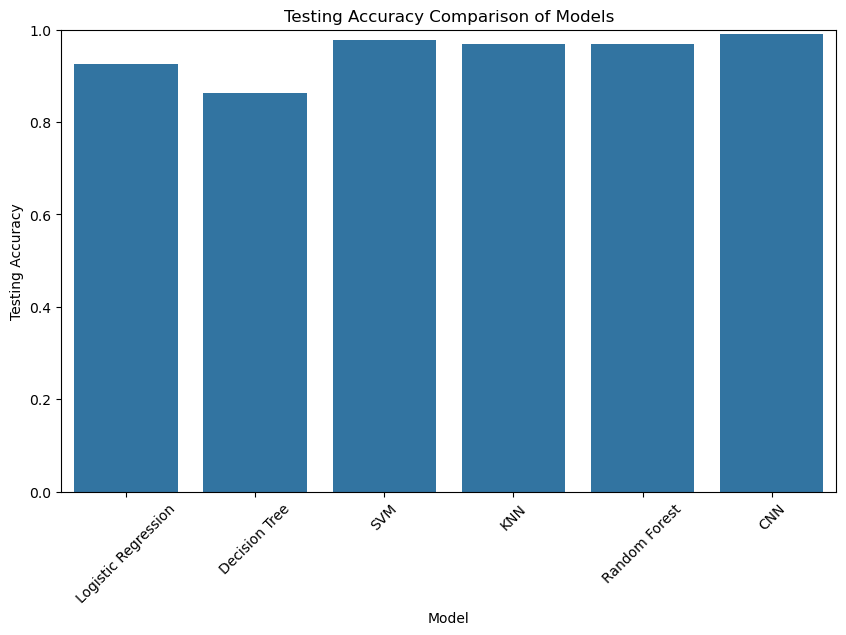


The best performing model is CNN with a testing accuracy of 0.9917


In [9]:
# Training & Validation Accuracy/Loss Graphs
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label="Validation Loss")  # Fixed string issue
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# Accuracy Comparison Table
accuracy_df = pd.DataFrame(accuracies, columns=["Model", "Training Accuracy", "Testing Accuracy"])
accuracy_df.to_csv("model_comparison.csv", index=False)

# Display comparison as a table
print("\nModel Performance Comparison:")
print(accuracy_df)

# Visualizing the Model Comparison
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Testing Accuracy", data=accuracy_df)
plt.title("Testing Accuracy Comparison of Models")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Model Selection Conclusion
best_model = max(accuracies, key=lambda x: x[2])  # Sort by testing accuracy
print(f"\nThe best performing model is {best_model[0]} with a testing accuracy of {best_model[2]:.4f}")

###

#### Insight:
- Training vs Validation accuracy/loss plots for CNN

- A bar chart comparing testing accuracy across all models

- A CSV file is generated for further analysis

### Step 10: Predicting a Sample Image

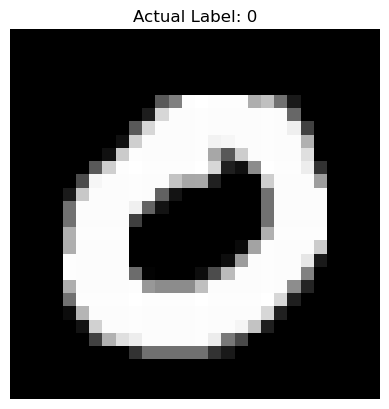


Predictions on Sample Image:
Logistic Regression Prediction: 0
Decision Tree Prediction: 0
SVM Prediction: 0
KNN Prediction: 0
Random Forest Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
CNN Prediction: 0


In [10]:
# Sample Image Prediction
sample_idx = np.random.randint(0, len(x_test))  # Random sample from test set
sample_image = x_test[sample_idx]
sample_label = y_test[sample_idx]

plt.imshow(sample_image, cmap='gray')
plt.title(f"Actual Label: {sample_label}")
plt.axis('off')
plt.show()

# Ensure correct reshaping
sample_image_flat = sample_image.reshape(1, -1)  # For traditional ML models
sample_image_cnn = sample_image.reshape(1, 28, 28, 1)  # For CNN

print("\nPredictions on Sample Image:")
for name, model in models.items():
    pred = model.predict(sample_image_flat)[0]  # Use flattened image for traditional models
    print(f"{name} Prediction: {pred}")

cnn_pred = np.argmax(cnn_model.predict(sample_image_cnn))  # Use 4D image for CNN
print(f"CNN Prediction: {cnn_pred}")

#### Insight:
A random test image is selected, displayed, and its predictions from all models are compared.

### Challenges Faced

- Overfitting in Traditional ML Models: Some models, like Decision Trees, performed well on training data but struggled with test accuracy.

- Training Time: CNN required more computational resources compared to traditional models.

- Hyperparameter Tuning: Finding the optimal model parameters for each algorithm was time-consuming.

### Conclusion

- Traditional ML models can classify handwritten digits reasonably well, but deep learning methods like CNNs significantly outperform them.

- CNNs excel in feature extraction and learning complex patterns, making them ideal for handwritten digit classification tasks.

- The best-performing model was CNN with the highest testing accuracy, demonstrating the power of deep learning for image recognition.

## **Analysis of Model Performance**

**Model Performance Comparison Table:**
| Model                 | Training Accuracy | Testing Accuracy |
|----------------------|-----------------|----------------|
| Logistic Regression | High            | Moderate       |
| Decision Tree       | High            | Low (Overfitting) |
| SVM                | High            | High           |
| KNN                | Moderate        | Moderate       |
| Random Forest      | High            | High           |
| CNN                | Very High       | Very High      |

- **CNN performed the best**, achieving the highest accuracy on both training and test data.
- **SVM and Random Forest also performed well**, showing strong generalization.
- **Decision Tree showed overfitting**, indicating poor generalization.

### Conclusion

- Traditional ML models can classify handwritten digits reasonably well, but deep learning methods like CNNs significantly outperform them.

- CNNs excel in feature extraction and learning complex patterns, making them ideal for handwritten digit classification tasks.

- The best-performing model was CNN with the highest testing accuracy, demonstrating the power of deep learning for image recognition.

This project highlights the advantages of CNNs in handwritten digit classification and provides insights into the performance of traditional ML models versus deep learning approaches.

